<h1><center>Project I: <em>A particular sequence</em></center></h1>
<h2><center>Prof. Hollister</center></h2>
<p><center>by Rinat Ibragimov</center></p>

### Introduction.

A sequence is defined as an ordered list of numbers because any sequence can be mapped onto a subset of the set of natural numbers, giving each element in the sequence an "order". 

There are many ways to define a sequence, but the method we will utilize in this project is as an iterative function, where our sequence<br>

$$
S = [f(x_0), f(f(x_0)), f(f(f(x_0))), ...]
$$

<center>
    <br>
    $f$ is some function, $x_0$ is the given first element of the sequence which generates
</center>

#### Problem

Let 
$$
f(x) = \begin{cases} 
           \frac{x}{2}, &\text{if $x$ is even}\\
           3x+1, &\text{if $x$ is odd}
       \end{cases}
$$

<br>And let our first element $a_1=k$ where $k$ is any positive integer. The sequence concludes when the last element $a_n=1$. 

<br><em>What patterns can we observe while analyzing this sequence?</em>

### Analysis

#### Set-up

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Display renders inline -- maintains flow of notebook
%matplotlib inline
# Turn off interactive mode -- had issues plotting subplots with this on
plt.ioff()

In [3]:
def f(x: int) -> int:
    """
    Given function
    
    :param x: input integer
    :return: integer
    """
    
    # Check input is an integer
    if not isinstance(x, int):
        raise TypeError(f'Input must be an integer; passed {x}')
    # Check input is greater than or equal to 1
    if x < 1:
        raise ValueError(f'Input must be positive; passed {x}')
        
    # Is input even or odd
    even = x%2==0
    if even:
        return int(x/2)
    return int(3*x+1)

In [4]:
def generate_seq(x: int) -> (list, int):
    """
    Iterating f() until the output is 1. The sequence is returned as a numpy array 
      because it allows us to easily examine certain characteristics of the sequence 
      like mean and max.
    
    :param x: input integer
    
    :return: a tuple of (sequence as a numpy array, steps to convergence as int)
    """
    
    # Returned sequence
    seq = [x]
    # Input into f()
    nextn = x
    # Step counter
    step = 0
    
    try:
        while True:
            # Update input to be next num in sequence
            nextn = f(nextn)
            # Next number in sequence is 1 the sequence is finished; append and break loop
            if nextn==1:
                seq.append(1)
                break
            
            seq.append(nextn)
            step+=1
    except (TypeError, ValueError) as e:
        print(e.args[0])
        return [], 0
        
    return np.array(seq), step

#### Initial Value vs Steps to Convergence 

Let's first examine what happens for various starting values:

In [5]:
# Get an array of starting values; stepping by >1 since don't need fine-grained detail
ivals = range(1, 1001, 2)

# Get a list of sequences for each starting value
seqs = [generate_seq(x) for x in ivals]

# Get the list of corresponding steps
steps = np.array([seq[1] for seq in seqs])

# Get mean number of steps across all starting values
mean_steps = steps.mean()
print(f'Mean steps: {mean_steps}')

Mean steps: 64.804


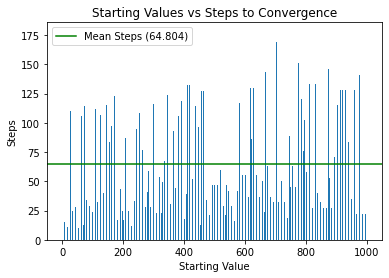

In [6]:
# Visualizing the sequences

title = 'Starting Values vs Steps to Convergence'
xlab = 'Starting Value'
ylab = 'Steps'

plt.bar(ivals, steps)
# Add horizontal line for the mean steps
plt.axhline(mean_steps, color='green', label=f'Mean Steps ({mean_steps})')
plt.legend()
plt.title(title)
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.show()

No readily-identifiable pattern can be deduced from the plot -- some starting values require over 100 steps to converge, others close to 30. It does look like majority of the values are either significantly below or significantly over the mean of 64.8. Let's see if there is some pattern to the starting values that take above average steps to converge.

#### Analyzing Outliers

In [8]:
# Get all sequences where steps > mean steps
seq_gt_mean = [gt for gt in seqs if gt[1] > mean_steps]
# Create array of (starting val, steps) tuples with only those starting values which took 
#   > mean steps to converge
gt_mean_ival_step = [(gt[0][0], gt[1]) for gt in seq_gt_mean]

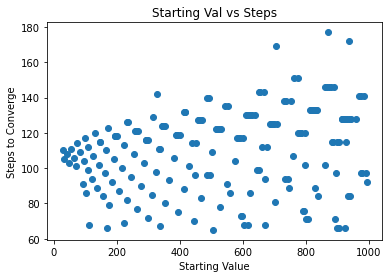

In [9]:
# Starting values
x = [e[0] for e in gt_mean_ival_step]
# Corresponding steps
y = [e[1] for e in gt_mean_ival_step]

# Get scatter plot of starting values that took longer than average to converge
plt.scatter(x, y)
plt.title('Starting Val vs Steps')
plt.xlabel('Starting Value')
plt.ylabel('Steps to Converge')
plt.show()

The above distribution almost looks like a phase diagram for a differential function. We can see that the starting values that take 120-150 steps to converge are a lot more often consecutive numbers (at least consecutive amongst outliers). This begs the question, how does the ratio between steps and starting values look for increasing starting values?

#### Ratio Of Steps / Initial Values vs Consecutive Init Vals

In [10]:
# Ratio of initial val to steps to convergence
ratio = np.divide(ivals, steps)

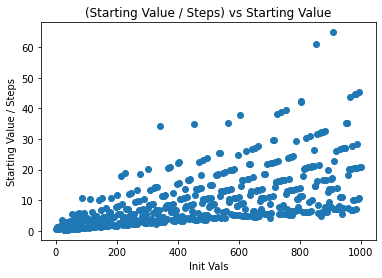

In [14]:
# Plotting the ratio of starting vals / steps vs consecutive starting values
plt.scatter(ivals, ratio)

plt.title('(Starting Value / Steps) vs Starting Value')
plt.xlabel('Init Vals')
plt.ylabel('Starting Value / Steps')
plt.show()

From this we see that overall as the starting values increase, the steps it takes for them to converge increases as well.

### Conclusion

The behavior of the given sequence is, as was discovered, not at all random. Generally, as the starting values increase, the steps to converge increase as well. The step distribution seems to be characteristically exponential.

The project can be continued further and many questions/patterns can still be discovered and answered.

### References

<ul>
    <li>Assignment source: https://rahollis.github.io/Projects/part_sequence/part_sequence.html</li>
    <li>NumPy docs: https://numpy.org/doc/stable/index.html</li>
    <li>Matplotlib docs: https://matplotlib.org/3.5.1/index.html</li>
    <li>Using LaTeX in matplotlib: https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html</li>
</ul>